In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [3]:
# Load the dataset
df = pd.read_csv('company_data.csv')


In [4]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [6]:
df1=pd.Series(df['Sales'])
s=[]
for i in df1:
    if i>9:
        s.append('good')
    
    else:
        s.append('bad')
print(s)

['good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad'

In [7]:
df2=pd.DataFrame(s)
df3=pd.concat([df2,df],axis=1)
df3=df3.rename({0:'o/p'},axis=1)
df3

,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,good,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,bad,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,bad,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,good,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,bad,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,bad,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,bad,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df3.iloc[:, 7] = labelencoder.fit_transform(df3.iloc[:,7])
df3.iloc[:,10]=labelencoder.fit_transform(df3.iloc[:,10])
df3.iloc[:,11]=labelencoder.fit_transform(df3.iloc[:,11])
df3.iloc[:,0]=labelencoder.fit_transform(df3.iloc[:,0])

In [9]:
df3

,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,0,42,17,1,1
1,1,11.22,111,48,16,260,83,1,65,10,1,1
2,1,10.06,113,35,10,269,80,2,59,12,1,1
3,0,7.40,117,100,4,466,97,2,55,14,1,1
4,0,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,12.57,138,108,17,203,128,1,33,14,1,1
396,0,6.14,139,23,3,37,120,2,55,11,0,1
397,0,7.41,162,26,12,368,159,2,40,18,1,1
398,0,5.94,100,79,7,284,95,0,50,12,1,1


In [10]:
array=df3.values

In [11]:
X=array[:,2:10]
Y=array[:,0]

In [12]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = array[:,0:10]
Y = array[:,10]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.69


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
from sklearn import tree

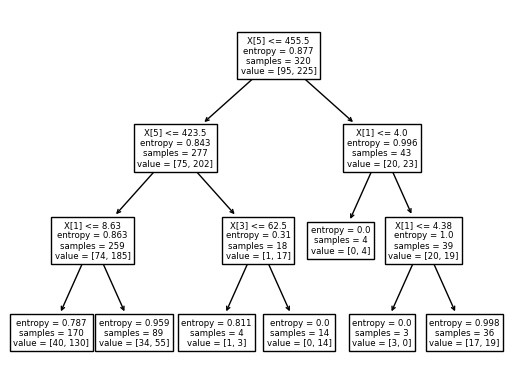

In [18]:
#PLot the decision tree
tree.plot_tree(model);

In [19]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category


1.0    80
dtype: int64

In [20]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
# Accuracy 
np.mean(preds==y_test)

0.7125

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [23]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7125

In [26]:
kfold =KFold(n_splits=10,shuffle =True,random_state =None)
model1 =RandomForestClassifier(n_estimators=100,max_features =3)
results=cross_val_score(model1,X,Y, cv =kfold)

In [27]:
print(results)

[0.675 0.75  0.625 0.675 0.575 0.775 0.625 0.675 0.575 0.775]


In [28]:
print(np.mean(results))

0.6725000000000001


In [29]:
from sklearn.ensemble import BaggingClassifier

In [31]:
kfold1 =KFold(n_splits =10,shuffle =True,random_state=10)
model2=RandomForestClassifier(n_estimators =100,criterion ='entropy',max_features =3)
model3 =BaggingClassifier(base_estimator =model2,n_estimators =100,random_state =10)
results1 =cross_val_score(model3,X,Y,cv=kfold1)

In [32]:
print(results1)

[0.85  0.7   0.725 0.575 0.625 0.675 0.675 0.8   0.725 0.65 ]
